# TP N°3 : Les Réseaux de Neurones Convolutifs

## Travail fait par : Yasmine Gharbi et Arij Habbechi RT4/1

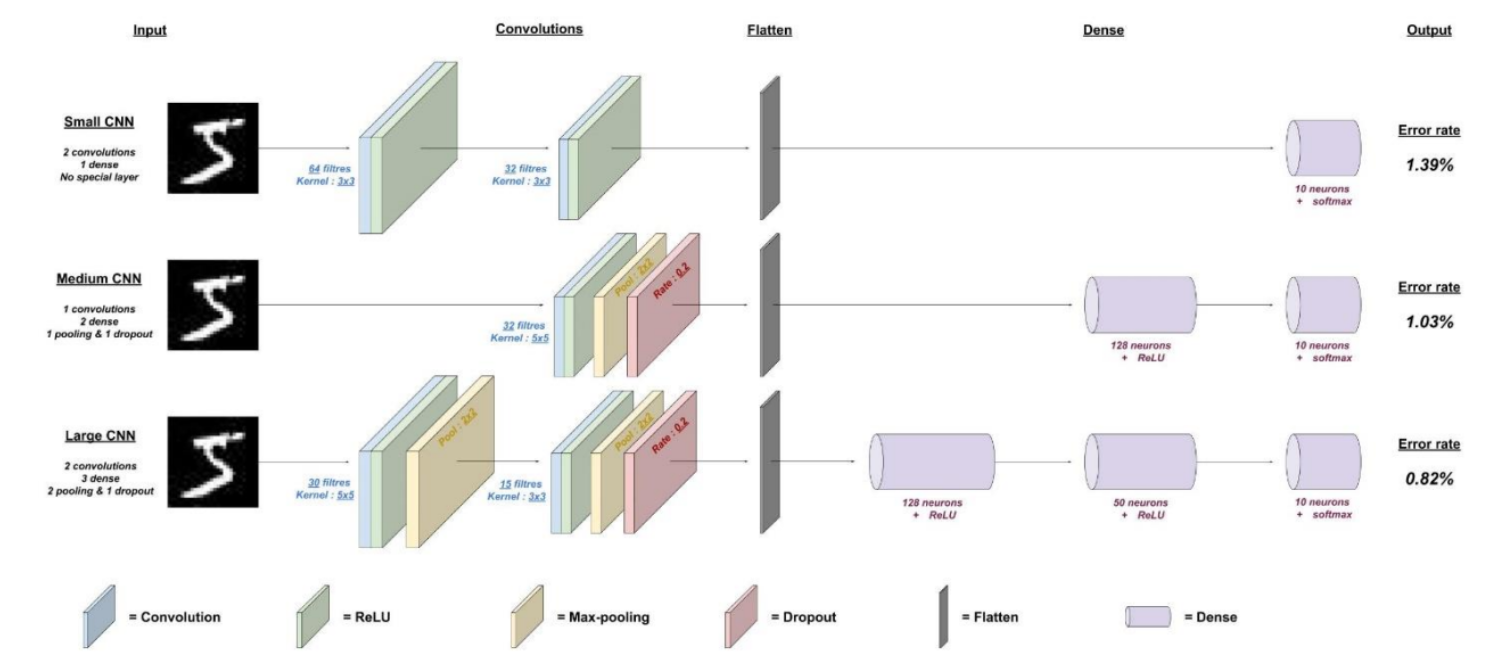

## Construction du 1er réseau

On commence par les importations necéssaires :


`from keras.datasets import mnist:` mnist est une base de données de chiffres manuscrits, faisant partie des ensembles de données préchargés dans keras.datasets.

`from keras import backend as K`: Keras fournit un module backend permettant d'effectuer des opérations tensorielles en arrière-plan, utilisé ici pour définir le format des données d'image.


`from keras.models import Sequential:` Sequential est un type de modèle dans Keras, permettant de créer des modèles couche par couche de manière séquentielle.


`from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D: `Ces importations concernent différents types de couches pouvant être ajoutées à un modèle, comme les couches Dense, Dropout, Flatten, Conv2D et MaxPooling2D, utilisées pour construire des réseaux de neurones.


`from tensorflow.keras.utils import to_categorical:` Cette importation fournit une fonction utilitaire, to_categorical, permettant de convertir des étiquettes entières en un format one-hot encoding, utile pour représenter les variables catégoriques.

In [ ]:
import numpy as np
from keras.datasets import mnist
# from keras.utils import np_utils
#import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')
#fix random seed for reproducibility
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from tensorflow.keras.utils import to_categorical

In [ ]:
def get_data_mnist():

 #load data
 (X_train, y_train),(X_test, y_test)= mnist.load_data()
# reshape to be [samples][pixels][width][height]
 X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
 X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
#one hot encode outputs
 y_train = to_categorical(y_train)
 y_test = to_categorical(y_test)
 num_classes = y_test.shape[1]
 return (X_train, y_train), (X_test, y_test), num_classes



### Que fait la la fonction get_data_mnist() ?

1. **Chargement des données :**

  Le BD MNIST comprend 60 000 images d'entraînement et 10 000 images de test. Ces images ont une taille de 28x28 pixels et sont en niveaux de gris, ce qui signifie que chaque pixel est représenté par une seule valeur (intensité du blanc sur un fond noir), ce qui en fait une image à un seul canal.
  Les données sont chargées à l'aide de `mnist.load_data()`, qui récupère directement les images avec leurs étiquettes correspondantes. Les étiquettes sont des chiffres de 0 à 9 qui représentent ce que chaque image illustre.

2. **Reshaping the Data:**

  Par défaut, chaque image dans le BD MNIST est formée comme une matrice de 28x28. Pour une utilisation dans un CNN avec TensorFlow (et compte tenu de la configuration de Keras pour manipuler les données), nous avons besoin des données qui inclut explicitement la dimension du canal.
  Les données sont remodelées de (60000, 28, 28) pour l'entraînement et (10000, 28, 28) pour les tests à (60000, 1, 28, 28) et (10000, 1, 28, 28) respectivement. Ce format correspond à (nombre d'échantillons, nombre de canaux, hauteur, largeur).
  La fonction `reshape` est utilisée pour changer les dimensions, et astype('float32') convertit le type de données de uint8 (un entier non signé, allant de 0 à 255) en float32.

3. **Encodage one-hot des étiquettes :**

  Dans l'ensemble de données brut, les étiquettes sont des chiffres uniques correspondant aux images de chiffres (0-9). Pour une tâche de classification utilisant un réseau neuronal, il est avantageux de convertir ces étiquettes en un format encodé en one-hot.
  L'encodage one-hot transforme chaque étiquette en un vecteur binaire de longueur égale au nombre de classes (dans ce cas, 10). Par exemple, le chiffre 3 serait représenté par [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
  Cet encodage facilite la classification de l'image d'entrée par le CNN dans l'une des 10 classes. Le réseau produira des probabilités pour chaque classe, et la cible sera un vecteur, simplifiant le calcul de la perte lors de l'entraînement et améliorant l'efficacité du modèle.

4. **Retour des données traitées :**

  La fonction retourne les données d'entraînement et de test remodelées et encodées, ainsi que le nombre de classes (num_classes), dérivé de la forme des étiquettes encodées en one-hot.

In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[2]

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

In [ ]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
def small_model():
# create model
 model = Sequential()
 model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28),activation='relu'))
 model.add(Conv2D(32, (3, 3), activation='relu'))
 model.add(Flatten())
 model.add(Dense(num_classes, activation='softmax'))
#compile model
 model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')
 return model

1. **Initialisation du modèle :**

  On initialise unn modèle séquentiel dans Keras est qui une pile linéaire de couches.

2. **Ajout des couches de convolution :**

On  ajoute une couche de convolution au modèle avec 64 filtres de taille 3x3. Le paramètre input_shape est défini sur (1, 28, 28) ce qui correspond à la forme des images d'entrée (1 canal, 28 pixels en hauteur et largeur).
La fonction d'activation ReLU est utilisée poue introduire une non-linéarité dans le modèle.

On ajoute après une deuxième couche de convolution avec 32 filtres de taille 3x3, utilisant également l'activation ReLU. Cette couche affinera davantage les caractéristiques extraites par la première couche de convolution, capturant plus de détails.

3. Aplatissement de la sortie :

  Cette couche convertit les cartes de caractéristiques 2D générées par les couches de convolution en un vecteur 1D. C'est nécessaire car la couche suivante (une couche dense) attend une entrée 1D. L'aplatissement de la sortie la prépare pour un traitement entièrement connecté.

4. Ajout d'une couche dense avec activation Softmax :

  On joute une couche dense (entièrement connectée) avec autant de neurones qu'il y a de classes (10 dans le cas de l'ensemble de données MNIST). La fonction d'activation softmax est utilisée ici, ce qui est standard pour les problèmes de classification multi-classes. Elle produit des probabilités que l'entrée appartienne à chaque classe, rendant la prédiction finale plus interprétable.

5. Compilation du modèle :

  * Optimiseur : L'optimiseur Adam est spécifié.
  * Fonction de perte : categorical_crossentropy est utilisée car c'est la fonction de perte standard pour les problèmes de classification multi-classes lorsque les sorties sont fournies dans un format encodé en one-hot.
  * Métriques : des métriques comme l'exactitude sont utilisées pour évaluer les performances du modèle lors de l'entraînement et des tests.

In [ ]:
small_CNN = small_model()

In [ ]:
# Entraînement du modèle
small_CNN.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 7s 10ms/step - loss: 0.7097 - accuracy: 0.9320 - val_loss: 0.0751 - val_accuracy: 0.9734
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0635 - accuracy: 0.9799 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0705 - val_accuracy: 0.9811
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0748 - val_accuracy: 0.9812
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0942 - val_accuracy: 0.9784
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.1116 - val_accuracy: 0.9798
Epoch



### Entraînement du modèle avec fit() :

**X_train, y_train**: Il s'agit des données d'entraînement. X_train contient les images, et y_train comprend les étiquettes de classe encodées en one-hot.

**validation_data=(X_test, y_test) :** on spécifie les données sur lesquelles évaluer la perte et toutes les métriques du modèle à la fin de chaque époque.

**epochs**=10 : Une époque est un passage complet à travers l'ensemble de données d'entraînement. On spécifie que le modèle doit itérer sur l'ensemble des données 10 fois.

À chaque époque, le modèle tente d'apprendre les motifs dans les données en ajustant ses poids pour minimiser la fonction de perte.

Plusieurs époques sont nécessaires car un seul passage à travers l'ensemble de données n'est souvent pas suffisant pour apprendre toutes les caractéristiques et les motifs.

**batch_size=**200 : La taille du lot est le nombre d'exemples d'entraînement utilisés pour calculer le gradient lors de l'entraînement. Au lieu de mettre à jour les poids du modèle après chaque exemple (ce qui est coûteux en termes de calcul et lent), le modèle met à jour les poids après chaque lot de 200 exemples. Cela rend le processus d'entraînement plus rapide et peut également aider à obtenir une estimation du gradient plus stable et fiable.


La taille du lot affecte la précision de l'estimation du gradient d'erreur lors de la mise à jour des poids. Des tailles de lot plus grandes fournissent une estimation plus précise du gradient, mais elles nécessitent plus de mémoire et peuvent entraîner un entraînement plus lent. Des tailles de lot plus petites peuvent offrir un entraînement plus rapide mais peuvent entraîner un gradient bruyant, ce qui pourrait faire converger les poids vers des valeurs sous-optimales.


Pendant l'entraînement, les paramètres du modèle (poids et biais) sont ajustés pour minimiser la fonction de perte, et ses performances sont évaluées à l'aide de métriques d'exactitude. En spécifiant les époques et la taille du lot, on contrôle la vitesse et la qualité de l'apprentissage.

In [ ]:
def print_model_error_rate(model, X_test, y_test):
 # Final evaluation of the model
 scores = model.evaluate(X_test, y_test, verbose=0)
#  print(scores)
 print("Model score : %.2f%%" % (scores[1]*100))
 print("Model error rate : %.2f%%" % (100-scores[1]*100))

In [ ]:
print_model_error_rate(small_CNN, X_test, y_test)

Model score : 97.99%
Model error rate : 2.01%



**Score du modèle : 97,99%**

Ce score représente l'exactitude du modèle, c'est-à-dire que le modèle a correctement prédit les chiffres manuscrits 97,99% du temps sur l'ensemble de validation (ou l'ensemble de test). Une précision de près de 98% est assez élevée, surtout pour des modèles relativement simples comme le petit CNN que vous avez implémenté. Cela indique que votre modèle apprend efficacement à reconnaître les chiffres manuscrits à partir des données d'image.

**Taux d'erreur du modèle : 2,01%**

Le taux d'erreur complète l'exactitude et indique la proportion de prédictions incorrectes. Dans ce cas, le modèle a commis une erreur dans 2,01% des cas sur l'ensemble de validation. Ce faible taux d'erreur appuie la haute précision, montrant que le modèle se comporte bien dans la distinction entre différents chiffres.


 Les résultats suggèrent que la configuration du modèle, y compris l'architecture et les hyperparamètres (comme le nombre de filtres de convolution, la taille du noyau et les époques), est bien adaptée à cette tâche. Le CNN a réussi à capturer les caractéristiques essentielles des images de chiffres manuscrits pour effectuer des classifications précises.

 De plus, étant donné que ces résultats sont basés sur l'ensemble de test, que le modèle n'a pas vu pendant l'entraînement, la haute précision et le faible taux d'erreur indiquent une bonne généralisation. Cela signifie que le modèle est susceptible de bien se comporter sur d'autres données invisibles de nature similaire (c'est-à-dire d'autres images de chiffres manuscrits).

## Construction des 3 modèles après normalisation de données

In [ ]:
def get_data_mnist_normalized():
    # Load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape to be [samples][pixels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # Normalization
    X_train /= 255
    X_test /= 255

    # One hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes

**La normalisation permet de réduire l’écart entre les valeurs extrêmes et d’éviter les overflow dans les calculs car des nombres supérieurs à 1 peuvent rapidement tendre vers l’infini si on n’est pas prudent.**

In [ ]:
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist_normalized()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train[2]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
# Entraînement du modèle
small_CNN.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 7s 10ms/step - loss: 0.2275 - accuracy: 0.9339 - val_loss: 0.0686 - val_accuracy: 0.9786
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0490 - val_accuracy: 0.9838
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0454 - val_accuracy: 0.9857
Epoc

In [ ]:
print_model_error_rate(small_CNN, X_test, y_test)

Model score : 98.40%
Model error rate : 1.60%


Les résultats  montrent **un score de 98,40%** et un **taux d'erreur de 1,60%,** représentent une amélioration par rapport aux scores précédents.

Cette amélioration peut être principalement attribuée à la normalisation des données. :

La normalisation implique généralement de mettre à l'échelle les caractéristiques d'entrée (les valeurs de pixels des images) pour qu'elles soient dans une plage similaire, généralement de 0 à 1. **Cela améliore la façon dont les réseaux neuronaux traitent les données d'entrée.**

En plus Lorsque les caractéristiques sont normalisées, chaque entrée contribue approximativement de manière proportionnelle au modèle d'apprentissage final. Sans normalisation, des plages de données très variables peuvent rendre le processus d'entraînement lent et instable, car les gradients peuvent osciller avant de trouver un minimum.

Elle aide également à éviter que certaines caractéristiques dominent le processus d'apprentissage simplement parce qu'elles sont sur une plus grande échelle par rapport aux autres.

 Finalement, elle aide à ce qui aide la descente de gradient à converger plus rapidement et efficacement.






## Construction de medium CNN :
### **Architecture :**
1. Première couche de convolution : 32 filtres de taille 5x5 avec activation ReLU.
2. Couche de Max Pooling : de taille 2x2, qui réduit les dimensions spatiales (hauteur et largeur) de moitié, réduisant ainsi efficacement le nombre de paramètres et de calculs dans le réseau.
3. Couche de Dropout : Réglée à 0,2, cette couche définit aléatoirement 20% des unités d'entrée à zéro à chaque étape pendant l'entraînement, ce qui aide à prévenir le surajustement.
4. Couche de Flattening : on convertit les cartes de caractéristiques 2D en un vecteur de caractéristiques 1D, permettant de connecter les couches de convolution aux couches denses.
5. Couche Dense : Avec 128 unités et activation ReLU, cette couche ajoute une capacité supplémentaire au modèle pour apprendre des motifs complexes.
6. Couche de sortie : Une dernière couche dense avec 10 unités (une pour chaque chiffre) et activation softmax, utilisée pour la classification multi-classe afin de produire des probabilités de chaque classe.

In [ ]:
def medium_CNN():
    # create model
    model = Sequential()

    # Ajouter une couche de convolution avec 32 filtres en 5x5 et une activation ReLU
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(1, 28, 28)))

    # Ajouter une couche de max-pooling 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Ajouter une couche de dropout
    model.add(Dropout(0.2))

    # Applatissement des données
    model.add(Flatten())

    # Ajouter une couche dense avec 128 sorties et une activation ReLU
    model.add(Dense(128, activation='relu'))

    # Ajouter une couche de sortie avec 10 sorties et une activation softmax
    model.add(Dense(num_classes, activation='softmax'))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
medium_CNN = medium_CNN()

Le modèle a été entraîné pendant 10 époques avec une taille de lot de 200. Cette configuration a fourni un équilibre entre la vitesse d'entraînement et la performance du modèle, permettant au modèle d'apprendre efficacement à partir de l'ensemble de données.

In [ ]:
# Entraînement du modèle
medium_CNN.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 5ms/step - loss: 0.2372 - accuracy: 0.9305 - val_loss: 0.0800 - val_accuracy: 0.9746
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0525 - val_accuracy: 0.9830
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9840 - val_loss: 0.0489 - val_accuracy: 0.9845
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0358 - val_accuracy: 0.9870
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch 

In [ ]:
print_model_error_rate(medium_CNN, X_test, y_test)

Model score : 99.01%
Model error rate : 0.99%


On remarque une amélioration de l'exactitude au fil des époques, l'exactitude à la fois sur l'ensemble d'entraînement et sur l'ensemble de validation s'est améliorée de manière significative à chaque époque, indiquant que le modèle apprenait efficacement à partir des données d'entraînement.

Exactitude et perte de validation : L'exactitude de validation a atteint jusqu'à 99,01% avec une perte de validation correspondante de 0,0304 à la fin de l'entraînement. Cela montre une excellente performance du modèle et une généralisation sur des données invisibles.

L'évaluation finale du modèle donne des scores qui reflètent que le modèle est très précis et efficace pour reconnaître les chiffres manuscrits de l'ensemble de données MNIST. Un taux d'erreur inférieur à 1% est exceptionnellement bon, indiquant que le modèle échoue très rarement.

## Contruction de large CNN
Cette architecture est plus complexe et plus profonde par rapport aux modèles précédents, conçue pour capturer des caractéristiques plus détaillées des images :

1. Première couche de convolution : Utilise 30 filtres de taille 5x5 avec activation ReLU.
2.  Couche de Max Pooling : Un pooling de 2x2 réduit les dimensions spatiales, ce qui aide à réduire la complexité computationnelle et le surajustement en résumant les caractéristiques.
3. Deuxième couche de convolution : Applique 15 filtres de taille 3x3 avec activation ReLU, affinant davantage les caractéristiques extraites par la première couche.
4. Couche de Dropout : Réglée à 0,2.
5. Couche de flattening.
6. Première couche dense : Contient 128 neurones avec activation ReLU, aide à apprendre à partir des caractéristiques complexes.
7. Deuxième couche dense : Comprend 50 neurones également avec activation ReLU, ajoutant un autre niveau d'abstraction avant la sortie finale.
8. Couche de sortie.

In [ ]:
def large_model():
    # create model
    model = Sequential()

    # Ajouter une couche de convolution avec 30 filtres en 5x5 et une activation ReLU
    model.add(Conv2D(30, kernel_size=(5, 5), activation='relu', input_shape=(1, 28, 28)))

    # Ajouter une couche de max-pooling 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Ajouter une autre couche de convolution avec 15 filtres en 3x3 et une activation ReLU
    model.add(Conv2D(15, kernel_size=(3, 3), activation='relu'))

    # Ajouter une couche de dropout
    model.add(Dropout(0.2))

    # Applatissement des données
    model.add(Flatten())

    # Ajouter une couche dense avec 128 sorties et une activation ReLU
    model.add(Dense(128, activation='relu'))

    # Ajouter une couche dense avec 50 sorties et une activation ReLU
    model.add(Dense(50, activation='relu'))

    # Ajouter une couche de sortie avec 10 sorties et une activation softmax
    model.add(Dense(num_classes, activation='softmax'))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
large_CNN = large_model()

In [ ]:
# Entraînement du modèle
large_CNN.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 7ms/step - loss: 0.3026 - accuracy: 0.9083 - val_loss: 0.0994 - val_accuracy: 0.9695
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9746 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0374 - val_accuracy: 0.9870
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0286 - val_accuracy: 0.9904
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0240 - val_accuracy: 0.9923
Epoch 

Le modèle a été entraîné pendant 10 époques avec une taille de lot de 200, équilibrant la vitesse d'entraînement et la qualité de l'apprentissage

In [ ]:
print_model_error_rate(large_CNN, X_test, y_test)

Model score : 99.07%
Model error rate : 0.93%


Le modèle à  atteint une exactitude de validation finale de 99,07%, ce qui est excellent et indique que le modèle a appris à reconnaître et à différencier efficacement entre les chiffres manuscrits.

Le taux d'erreur final du modèle de 0,93% est remarquablement bas, confirmant la fiabilité du modèle dans la prédiction correcte des données invisibles.

## Comparaisons et observations :

| Attribut | Petit CNN | Moyen CNN | Grand CNN |
| --- | --- | --- | --- |
| Couches de convolution | 2 couches:<br>1. 64 filtres (3x3)<br>2. 32 filtres (3x3) | 1 couche:<br>1. 32 filtres (5x5) | 2 couches:<br>1. 30 filtres (5x5)<br>2. 15 filtres (3x3) |
| Fonctions d'activation | ReLU pour les deux couches | ReLU pour la convolution | ReLU pour toutes les couches |
| Max Pooling | Aucun | Oui, 2x2 | Oui, 2x2 |
| Dropout | Aucun | Aucun | 0.2 |
| Couches denses | 1 couche dense:<br>10 sorties (softmax) | 2 couches denses:<br>1. 128 sorties (ReLU)<br>2. 10 sorties (softmax) | 3 couches denses:<br>1. 128 sorties (ReLU)<br>2. 50 sorties (ReLU)<br>3. 10 sorties (softmax) |
| Complexité du modèle | Inférieure | Modérée | Supérieure |
| Exactitude d'entraînement finale | 99,65% | 99,52% | 99,41% |
| Exactitude de validation finale | 97,99% | 99,01% | 99,07% |
| Taux d'erreur | 2,01% | 0,99% | 0,93% |

* Complexité : large CNN est le plus complexe en raison de ses multiples couches de convolution, de sa couche de dropout et de ses multiples couches denses. Cette complexité lui permet de capturer des caractéristiques plus détaillées et de bien performer, même sur des variations nuancées des données. Le medium CNN  offre un équilibre avec une seule couche de convolution suivie de max pooling et de quelques couches denses. Le small CNN est le plus simple, avec moins de couches et sans dropout ni pooling, ce qui pourrait limiter sa capacité à généraliser par rapport aux autres modèles.

  Ajouts de Max Pooling et de Dropout :

  **Max Pooling :**

  Réduit la Dimensionnalité : Le max pooling réduit les dimensions spatiales (hauteur et largeur) du volume d'entrée pour la couche de convolution suivante. Il le fait sans perdre les informations importantes sur la présence des caractéristiques.
  En réduisant la dimensionnalité, le max pooling aide à contrôler le surajustement en fournissant une forme abstraite des caractéristiques. Il réduit également la complexité computationnelle en diminuant le nombre de paramètres à apprendre.

 **Dropout :**

   Le dropout est une forme de technique de régularisation qui "supprime" un ensemble aléatoire d'activations dans une couche en les mettant à zéro pendant l'entraînement. Cela aide à rendre le modèle robuste car il empêche le réseau de trop compter sur une seule caractéristique.
   
   
 * Le medium moyen offre le meilleur équilibre entre complexité et performance, atteignant une haute exactitude avec une complexité relativement moindre que le large CNN. Le large CNN, bien que légèrement plus précis, implique plus de paramètres et de coûts computationnels, ce qui pourrait ne pas être justifié par la petite amélioration de la performance. Le small CNN, bien que le moins complexe, ne parvient pas à fournir des performances satisfaisantes, le rendant adapté aux tâches plus rapides et moins gourmandes en ressources où une précision de premier ordre n'est pas critique.



## 6. Sauvegarde et chargements des modèles Keras :

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# This function saves a model on Google Drive using two files: a json and a h5
def save_keras_model_to_drive(model, filename):
    # Serialize model to JSON
    model_json = model.to_json()
    with open("/content/drive/My Drive/" + filename + ".json", "w") as json_file:
        json_file.write(model_json)
    # Serialize weights to HDF5
    model.save_weights("/content/drive/My Drive/" + filename + ".h5")

Mounted at /content/drive


In [ ]:
save_keras_model_to_drive(large_CNN, "large_CNN")

## Test avec une image externe de dataset :

we start by mounting the drive and the model saved in the drive :

In [ ]:
import os
from keras.models import model_from_json

# This function loads a model from two files: a json and a h5
# BE CAREFUL: the model NEEDS TO BE COMPILED before any use!
def load_keras_model_from_drive(filename):
    # Load json and create model
    json_file_path = os.path.join("/content/drive/My Drive/", filename + ".json")
    json_file = open(json_file_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # Load weights into new model
    h5_file_path = os.path.join("/content/drive/My Drive/", filename + ".h5")
    loaded_model.load_weights(h5_file_path)
    return loaded_model


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loaded_model = load_keras_model_from_drive("large_CNN")

a test image donne on microsoft paint of the number 3 is read and converted to the appropriate shape as input :

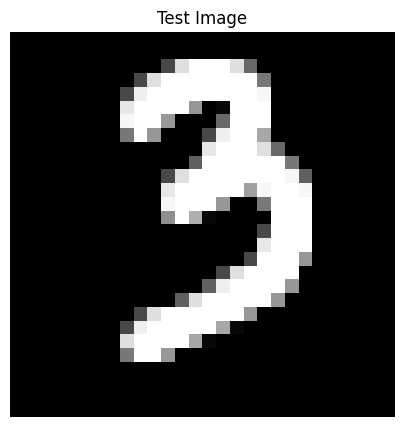

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/test.png"
image = Image.open(image_path)



# View the original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

# Convert the PIL image to a NumPy array
image_array = np.array(image)


In [ ]:
image_array.shape

(28, 28, 4)

In [ ]:
# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array_gray = np.array(image_gray)

# # Add a new axis to the image array to create a batch dimension
# image_array_gray = image_array_gray[np.newaxis, ...]

# # Inspect the shape of the image array
# print("Shape of the image array:", image_array_gray.shape)

In [ ]:
# Assuming image_array_gray has shape (28, 28)
image_array_gray = np.expand_dims(image_array_gray, axis=0)  # Add batch dimension
image_array_gray = np.expand_dims(image_array_gray, axis=1)  # Add channel dimension
# Convert image_array_gray to float32
image_array_gray = image_array_gray.astype('float32')

image_array_gray /= 255

In [ ]:
image_array_gray.shape

(1, 1, 28, 28)

we perform predictions on it :

In [ ]:
# Perform prediction using the loaded model
predictions = loaded_model.predict(image_array_gray)

# Interpret the predictions and use them according to your application
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 17ms/step
Predicted class: 3
